In [ ]:
from google.colab import files
print('upload your kaggle.json file:')
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d splcher/animefacedataset

!unzip -q animefacedataset.zip -d /content/anime_faces/

dataset_root_path = '/content/anime_faces'

فایل kaggle.json خود را آپلود کنید:


Saving kaggle.json to kaggle.json
✅ فایل API کگل با موفقیت تنظیم شد.

در حال دانلود دیتاست از کگل...
Dataset URL: https://www.kaggle.com/datasets/splcher/animefacedataset
License(s): DbCL-1.0
 98% 386M/395M [00:03<00:00, 115MB/s] 
100% 395M/395M [00:03<00:00, 123MB/s]
در حال استخراج فایل‌ها...
✅ دیتاست با موفقیت دانلود و استخراج شد.


In [ ]:
import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from model import VAE

params = {
    'batch_size': 128,
    'latent_dim': 200,
    'lr': 0.002,
    'epochs': 25,
    'kld_weight': 0.00025
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])



anime_dataset = datasets.ImageFolder(root=dataset_root_path, transform=transform)

anime_loader = DataLoader(dataset=anime_dataset,
                          batch_size=params['batch_size'],
                          shuffle=True,
                          num_workers=2,
                          pin_memory=True)

print(f"dataset loaded! pictures amount: {len(anime_dataset)}")

دیتاست با موفقیت بارگذاری شد! تعداد تصاویر: 63565


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model = VAE(latent_dim=params['latent_dim']).to(device)
optimizer = Adam(model.parameters(), lr=params['lr'])
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

weights_path = '/content/drive/MyDrive/vae_anime_checkpoint.pth'

if os.path.exists(weights_path):
    print("فایل وزن‌های ذخیره‌شده پیدا شد. در حال بارگذاری...")
    model.load_state_dict(torch.load(weights_path, map_location=device))
    print("✅ وزن‌ها با موفقیت بارگذاری شدند.")
else:
    print("هیچ فایل وزنی پیدا نشد. آموزش از ابتدا شروع می‌شود.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
هیچ فایل وزنی پیدا نشد. آموزش از ابتدا شروع می‌شود.


In [ ]:
for epoch in range(params['epochs']):
    model.train()

    progress_bar = tqdm(enumerate(anime_loader),
                        total=len(anime_loader),
                        desc=f"epoch {epoch+1}/{params['epochs']}")

    for batch_idx, (data, _) in progress_bar:
        data = data.to(device)
        recons, _, mu, log_var = model(data)
        loss, recons_loss, kl_div = model.loss_f(recons, data, mu, log_var, KW=params['kld_weight'])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        progress_bar.set_postfix(Loss=f'{loss.item():.4f}', Recon_Loss=f'{recons_loss.item():.4f}', KL_Div=f'{kl_div.item():.4f}')

    print(f'====> میانگین خطا در ایپاک {epoch+1} محاسبه شد.')
    scheduler.step()

    torch.save(model.state_dict(), weights_path)

شروع فرآیند آموزش...


ایپاک 1/25: 100%|██████████| 497/497 [00:46<00:00, 10.68it/s, KL_Div=18.4234, Loss=0.0354, Recon_Loss=0.0308]


====> میانگین خطا در ایپاک 1 محاسبه شد.
✅ مدل در ایپاک 1 ذخیره شد.


ایپاک 2/25: 100%|██████████| 497/497 [00:40<00:00, 12.21it/s, KL_Div=19.5803, Loss=0.0313, Recon_Loss=0.0264]


====> میانگین خطا در ایپاک 2 محاسبه شد.
✅ مدل در ایپاک 2 ذخیره شد.


ایپاک 3/25: 100%|██████████| 497/497 [00:41<00:00, 12.09it/s, KL_Div=18.7052, Loss=0.0304, Recon_Loss=0.0257]


====> میانگین خطا در ایپاک 3 محاسبه شد.
✅ مدل در ایپاک 3 ذخیره شد.


ایپاک 4/25: 100%|██████████| 497/497 [00:40<00:00, 12.30it/s, KL_Div=19.3170, Loss=0.0293, Recon_Loss=0.0245]


====> میانگین خطا در ایپاک 4 محاسبه شد.
✅ مدل در ایپاک 4 ذخیره شد.


ایپاک 5/25: 100%|██████████| 497/497 [00:40<00:00, 12.33it/s, KL_Div=22.1449, Loss=0.0301, Recon_Loss=0.0245]


====> میانگین خطا در ایپاک 5 محاسبه شد.
✅ مدل در ایپاک 5 ذخیره شد.


ایپاک 6/25: 100%|██████████| 497/497 [00:40<00:00, 12.22it/s, KL_Div=22.1024, Loss=0.0303, Recon_Loss=0.0248]


====> میانگین خطا در ایپاک 6 محاسبه شد.
✅ مدل در ایپاک 6 ذخیره شد.


ایپاک 7/25: 100%|██████████| 497/497 [00:40<00:00, 12.26it/s, KL_Div=22.7346, Loss=0.0295, Recon_Loss=0.0239]


====> میانگین خطا در ایپاک 7 محاسبه شد.
✅ مدل در ایپاک 7 ذخیره شد.


ایپاک 8/25: 100%|██████████| 497/497 [00:40<00:00, 12.28it/s, KL_Div=23.7628, Loss=0.0279, Recon_Loss=0.0220]

====> میانگین خطا در ایپاک 8 محاسبه شد.
✅ مدل در ایپاک 8 ذخیره شد.



ایپاک 9/25: 100%|██████████| 497/497 [00:39<00:00, 12.43it/s, KL_Div=22.3958, Loss=0.0282, Recon_Loss=0.0226]


====> میانگین خطا در ایپاک 9 محاسبه شد.
✅ مدل در ایپاک 9 ذخیره شد.


ایپاک 10/25: 100%|██████████| 497/497 [00:40<00:00, 12.24it/s, KL_Div=25.3661, Loss=0.0297, Recon_Loss=0.0233]


====> میانگین خطا در ایپاک 10 محاسبه شد.
✅ مدل در ایپاک 10 ذخیره شد.


ایپاک 11/25: 100%|██████████| 497/497 [00:40<00:00, 12.32it/s, KL_Div=22.5216, Loss=0.0279, Recon_Loss=0.0223]


====> میانگین خطا در ایپاک 11 محاسبه شد.
✅ مدل در ایپاک 11 ذخیره شد.


ایپاک 12/25: 100%|██████████| 497/497 [00:40<00:00, 12.19it/s, KL_Div=22.7734, Loss=0.0272, Recon_Loss=0.0215]


====> میانگین خطا در ایپاک 12 محاسبه شد.
✅ مدل در ایپاک 12 ذخیره شد.


ایپاک 13/25: 100%|██████████| 497/497 [00:40<00:00, 12.32it/s, KL_Div=22.9720, Loss=0.0283, Recon_Loss=0.0225]


====> میانگین خطا در ایپاک 13 محاسبه شد.
✅ مدل در ایپاک 13 ذخیره شد.


ایپاک 14/25: 100%|██████████| 497/497 [00:40<00:00, 12.13it/s, KL_Div=24.4790, Loss=0.0288, Recon_Loss=0.0226]


====> میانگین خطا در ایپاک 14 محاسبه شد.
✅ مدل در ایپاک 14 ذخیره شد.


ایپاک 15/25: 100%|██████████| 497/497 [00:41<00:00, 12.05it/s, KL_Div=24.2320, Loss=0.0290, Recon_Loss=0.0229]


====> میانگین خطا در ایپاک 15 محاسبه شد.
✅ مدل در ایپاک 15 ذخیره شد.


ایپاک 16/25: 100%|██████████| 497/497 [00:40<00:00, 12.21it/s, KL_Div=23.1911, Loss=0.0280, Recon_Loss=0.0222]


====> میانگین خطا در ایپاک 16 محاسبه شد.
✅ مدل در ایپاک 16 ذخیره شد.


ایپاک 17/25: 100%|██████████| 497/497 [00:40<00:00, 12.18it/s, KL_Div=25.4522, Loss=0.0271, Recon_Loss=0.0208]


====> میانگین خطا در ایپاک 17 محاسبه شد.
✅ مدل در ایپاک 17 ذخیره شد.


ایپاک 18/25: 100%|██████████| 497/497 [00:41<00:00, 12.08it/s, KL_Div=25.1264, Loss=0.0280, Recon_Loss=0.0217]


====> میانگین خطا در ایپاک 18 محاسبه شد.
✅ مدل در ایپاک 18 ذخیره شد.


ایپاک 19/25: 100%|██████████| 497/497 [00:40<00:00, 12.39it/s, KL_Div=24.1769, Loss=0.0286, Recon_Loss=0.0226]


====> میانگین خطا در ایپاک 19 محاسبه شد.
✅ مدل در ایپاک 19 ذخیره شد.


ایپاک 20/25: 100%|██████████| 497/497 [00:40<00:00, 12.18it/s, KL_Div=26.7744, Loss=0.0280, Recon_Loss=0.0213]

====> میانگین خطا در ایپاک 20 محاسبه شد.
✅ مدل در ایپاک 20 ذخیره شد.



ایپاک 21/25: 100%|██████████| 497/497 [00:39<00:00, 12.58it/s, KL_Div=24.2020, Loss=0.0287, Recon_Loss=0.0227]

====> میانگین خطا در ایپاک 21 محاسبه شد.
✅ مدل در ایپاک 21 ذخیره شد.



ایپاک 22/25: 100%|██████████| 497/497 [00:40<00:00, 12.22it/s, KL_Div=25.4700, Loss=0.0288, Recon_Loss=0.0224]


====> میانگین خطا در ایپاک 22 محاسبه شد.
✅ مدل در ایپاک 22 ذخیره شد.


ایپاک 23/25: 100%|██████████| 497/497 [00:41<00:00, 12.07it/s, KL_Div=24.1497, Loss=0.0290, Recon_Loss=0.0229]


====> میانگین خطا در ایپاک 23 محاسبه شد.
✅ مدل در ایپاک 23 ذخیره شد.


ایپاک 24/25: 100%|██████████| 497/497 [00:41<00:00, 12.10it/s, KL_Div=25.7118, Loss=0.0283, Recon_Loss=0.0219]


====> میانگین خطا در ایپاک 24 محاسبه شد.
✅ مدل در ایپاک 24 ذخیره شد.


ایپاک 25/25: 100%|██████████| 497/497 [00:40<00:00, 12.36it/s, KL_Div=26.0607, Loss=0.0287, Recon_Loss=0.0221]


====> میانگین خطا در ایپاک 25 محاسبه شد.
✅ مدل در ایپاک 25 ذخیره شد.


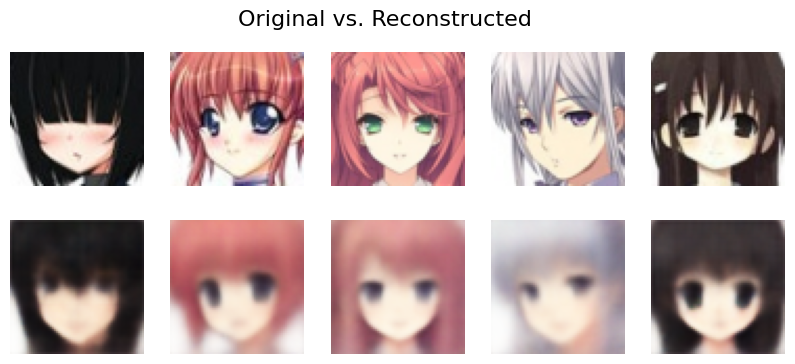


تولید نمونه‌های جدید...


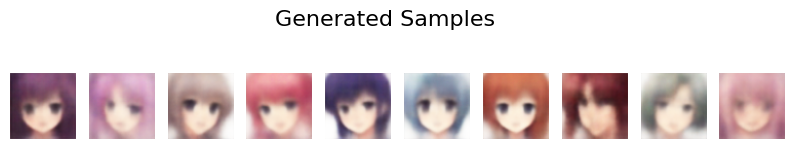

In [ ]:
model.eval()
with torch.no_grad():

    test_batch, _ = next(iter(anime_loader))
    test_batch = test_batch[:5].to(device)
    recons_batch, _, _, _ = model(test_batch)

    plt.figure(figsize=(10, 4))
    plt.suptitle("Original vs. Reconstructed", fontsize=16)
    for i in range(5):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(test_batch[i].cpu().permute(1, 2, 0))
        plt.axis('off')
        ax = plt.subplot(2, 5, i + 6)
        plt.imshow(recons_batch[i].cpu().permute(1, 2, 0))
        plt.axis('off')
    plt.show()

    print("\nتولید نمونه‌های جدید...")
    samples = model.sample(10, device)
    plt.figure(figsize=(10, 2))
    plt.suptitle("Generated Samples", fontsize=16)
    for i in range(10):
        ax = plt.subplot(1, 10, i + 1)
        plt.imshow(samples[i].cpu().permute(1, 2, 0))
        plt.axis('off')
    plt.show()

شروع فرآیند Interpolation...


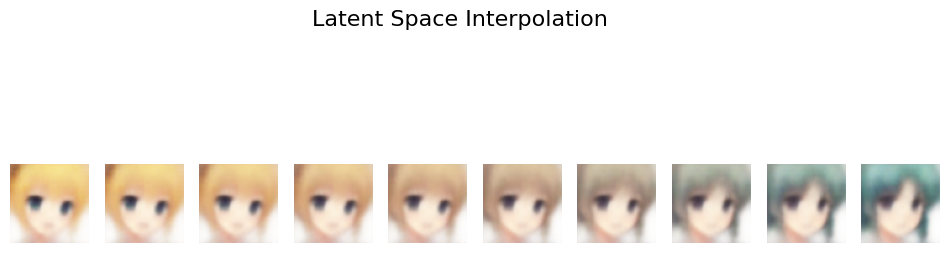

✅ فرآیند با موفقیت انجام شد.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("شروع فرآیند Interpolation...")
model.eval()
with torch.no_grad():

    batch, _ = next(iter(anime_loader))
    img1 = batch[0].unsqueeze(0).to(device)
    img2 = batch[1].unsqueeze(0).to(device)


    mu1, _ = model.encode(img1)
    mu2, _ = model.encode(img2)


    num_steps = 10
    interpolation_weights = np.linspace(0, 1, num_steps)
    interpolated_z = []
    for alpha in interpolation_weights:
        z = (1 - alpha) * mu1 + alpha * mu2
        interpolated_z.append(z)

    interpolated_z = torch.cat(interpolated_z, dim=0)


    interpolated_images = model.decode(interpolated_z)


    plt.figure(figsize=(12, 4))
    plt.suptitle("Latent Space Interpolation", fontsize=16)
    for i in range(num_steps):
        ax = plt.subplot(1, num_steps, i + 1)
        plt.imshow(interpolated_images[i].cpu().permute(1, 2, 0))
        plt.axis('off')
    plt.show()